In [1]:
#!pip install --user -U nltk

In [2]:
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [3]:
text = [['a', 'b', 'c'],['a','f','e','c', 'd', 'c', 'e', 'f'], ['a', 'c', 'd', 'c', 'e', 'f']]

In [4]:
l=[]
for t in text:
  d=list(bigrams(t))
  for li in d:
    l.append(li)
print(l);


[('a', 'b'), ('b', 'c'), ('a', 'f'), ('f', 'e'), ('e', 'c'), ('c', 'd'), ('d', 'c'), ('c', 'e'), ('e', 'f'), ('a', 'c'), ('c', 'd'), ('d', 'c'), ('c', 'e'), ('e', 'f')]


In [5]:
l=[]
for t in text:
  d=list(ngrams(t, n=3))
  for li in d:
    l.append(li)
print(l);

[('a', 'b', 'c'), ('a', 'f', 'e'), ('f', 'e', 'c'), ('e', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f')]


In [6]:
from nltk.util import pad_sequence
l=[]
for t in text:
  d=list(pad_sequence(t,
                  pad_left=True, left_pad_symbol="<s>",
                  pad_right=True, right_pad_symbol="</s>",
                  n=2))
l=[]
for t in d:
  e=list(ngrams(d, n=3))
  for li in e:
    l.append(li)
print(l);


[('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>'), ('<s>', 'a', 'c'), ('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f'), ('e', 'f', '</s>')]


In [7]:
try: # Use the default NLTK tokenizer.
    from nltk import word_tokenize, sent_tokenize 
    # Testing whether it works. 
    # Sometimes it doesn't work on some machines because of setup issues.
    word_tokenize(sent_tokenize("This is a foobar sentence. Yes it is.")[0])
except: # Use a naive sentence tokenizer and toktok.
    import re
    from nltk.tokenize import ToktokTokenizer
    # See https://stackoverflow.com/a/25736515/610569
    sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
    # Use the toktok tokenizer that requires no dependencies.
    toktok = ToktokTokenizer()
    word_tokenize = word_tokenize = toktok.tokenize

In [8]:
import os
import requests
import io #codecs


# Text version of https://kilgarriff.co.uk/Publications/2005-K-lineer.pdf
if os.path.isfile('language-never-random.txt'):
    with io.open('language-never-random.txt', encoding='utf8') as fin:
        text = fin.read()
else:
    url = "https://gist.githubusercontent.com/alvations/53b01e4076573fea47c6057120bb017a/raw/b01ff96a5f76848450e648f35da6497ca9454e4a/language-never-random.txt"
    text = requests.get(url).content.decode('utf8')
    with io.open('language-never-random.txt', 'w', encoding='utf8') as fout:
        fout.write(text)

In [9]:
# Tokenize the text.
tokenized_text = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(text)]
print(tokenized_text)

are', 'words', 'we', 'know', 'to', 'be', 'american', 'or', 'british', ',', 'or', 'to', 'refer', 'to', 'items', 'that', 'are', 'more', 'common', 'or', 'more', 'salient', 'in', 'the', 'us', 'or', 'the', 'uk.', 'as', 'the', 'argument', 'of', 'the', 'previous', 'section', 'explains', ',', 'most', 'of', 'the', 'marked', 'high-frequency', 'words', 'are', 'marked', 'simply', 'as', 'a', 'consequence', 'of', 'the', 'essen-', 'tially', 'non-random', 'nature', 'of', 'language', '.'], ['it', 'would', 'not', 'be', 'surprising', 'for', 'a', 'high-frequency', 'word', 'marked', 'as', 'british', 'english', 'in', 'these', 'lists', 'to', 'be', 'marked', 'as', 'american', 'english', 'in', 'a', 'repeat', 'of', 'the', 'experiment', 'using', 'new', 'data.', 'similar', 'strategies', 'are', 'used', 'by', ',', 'and', 'a', 'similar', 'critique', 'is', 'applicable', 'to', ',', 'leech', 'and', 'fallon', '(', '1992', ')', '(', 'again', ',', 'for', 'comparing', 'lob', 'and', 'brown', ')', ',', 'ray-', 'language', 'i

In [10]:
from nltk.util import everygrams
from nltk.lm.preprocessing import padded_everygram_pipeline
n = 3
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_text)

In [11]:
from nltk.lm import MLE
model = MLE(n) # Lets train a 3-grams model, previously we set n=3
len(model.vocab)
model.fit(train_data, padded_sents)
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 1429 items>


In [12]:
len(model.vocab)

1429

In [13]:
print(model.vocab.lookup(tokenized_text[3]))

('moreover', ',', 'where', 'there', 'is', 'enough', 'data', ',', 'we', 'shall', '(', 'almost', ')', 'always', 'be', 'able', 'to', 'establish', 'that', 'it', 'is', 'not', 'true', '.')


In [14]:
model.counts['enough'] # i.e. Count('language')

12

In [15]:
model.counts[['language']]['is'] # i.e. Count('is'|'language')

11

In [16]:
model.counts[['language', 'is']]['never'] # i.e. Count('never'|'language i

7

In [17]:
model.score('language') # P('language')

0.003916040100250626

In [18]:
model.score('is', 'there'.split())  # P('is'|'language')

0.7619047619047619

In [19]:
model.counts['there']  # P('never'|'language is')

21

In [20]:
model.counts[['is','enough']]['data']

5

In [21]:
model.score('data', 'there is enough'.split())

0

In [22]:
import pandas as pd

df = pd.read_csv('./Maid-monitoring.csv')

print(df.loc[0][2]) 

Hallway


In [23]:
final_data=[]
day_data=[]
for i in range (0,len(df.index)):  
  if i==1:
    day_data.append(df.loc[i][2])
  
  elif (i>1) and (df.loc[i][0]==df.loc[i-1][0]):
    day_data.append(df.loc[i][2])
  
  else:
    final_data.append(day_data)
    day_data.clear()
    day_data.append(df.loc[i][2])
print(final_data)


[['Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility'], ['Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility'], ['Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility'], ['Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility'], ['Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom',

In [24]:

import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis

import matplotlib.pyplot as plt

In [25]:
from nltk.util import pad_sequence
l=[]
final=[]
for t in final_data:
  d=list(pad_sequence(t,pad_left=True, left_pad_symbol="<s>",pad_right=True, right_pad_symbol="</s>",n=2))
  final.append(d)
l=[]
print(final)
for t in final:
  e=list(ngrams(t, n=3))
  for li in e:
    l.append(li)
print(l);


[['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen

<AxesSubplot:>

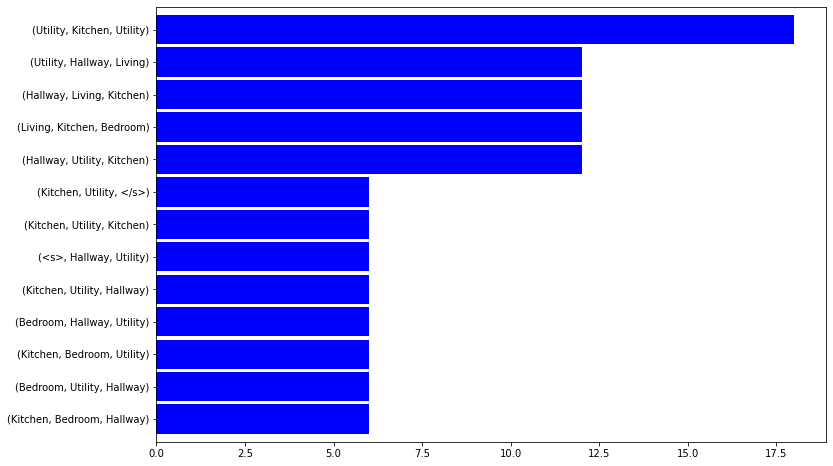

In [26]:
trigrams_series = pd.Series(l).value_counts()
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [27]:
print(final)

[['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>'], ['<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen

In [28]:
from nltk.util import everygrams
from nltk.lm.preprocessing import padded_everygram_pipeline
n = 3
train_data, padded_sents = padded_everygram_pipeline(n, final)
from nltk.lm import MLE
model = MLE(n) # Lets train a 3-grams model, previously we set n=3
print("Length of Model Before Training: ",len(model.vocab))
model.fit(train_data, padded_sents)
print("Length of Model After Training: ",len(model.vocab))

Length of Model Before Training:  0
Length of Model After Training:  8


In [29]:
print(model.vocab.lookup(final[2]))

('<s>', 'Hallway', 'Utility', 'Kitchen', 'Utility', 'Kitchen', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Utility', 'Hallway', 'Living', 'Kitchen', 'Bedroom', 'Hallway', 'Utility', 'Kitchen', 'Utility', '</s>')


In [30]:
print(model.counts)

<NgramCounter with 3 ngram orders and 432 ngrams>


In [31]:
model.counts[['Utility', 'Kitchen']]['Utility'] # i.e. Count('Utility'|'Utility Kitchen')

18

In [32]:
model.score('Utility', 'Utility Kitchen'.split())

1.0

In [33]:
!pip install dill

In [34]:
import dill as pickle 

In [35]:
with open('./maid_monitoring.pkl', 'wb') as fout:
    pickle.dump(model, fout)


In [36]:
with open('./maid_monitoring.pkl', 'rb') as fin:
    model_loaded = pickle.load(fin)

In [37]:
model_loaded.score('Utility', 'Utility Kitchen'.split())

1.0